In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')
from data_processing import load_data, clean_basic_data

In [2]:
reviews, products = load_data()
cleaning_reviews = clean_basic_data(reviews)

Started with 21674 reviews
After cleaning: 21674 reviews


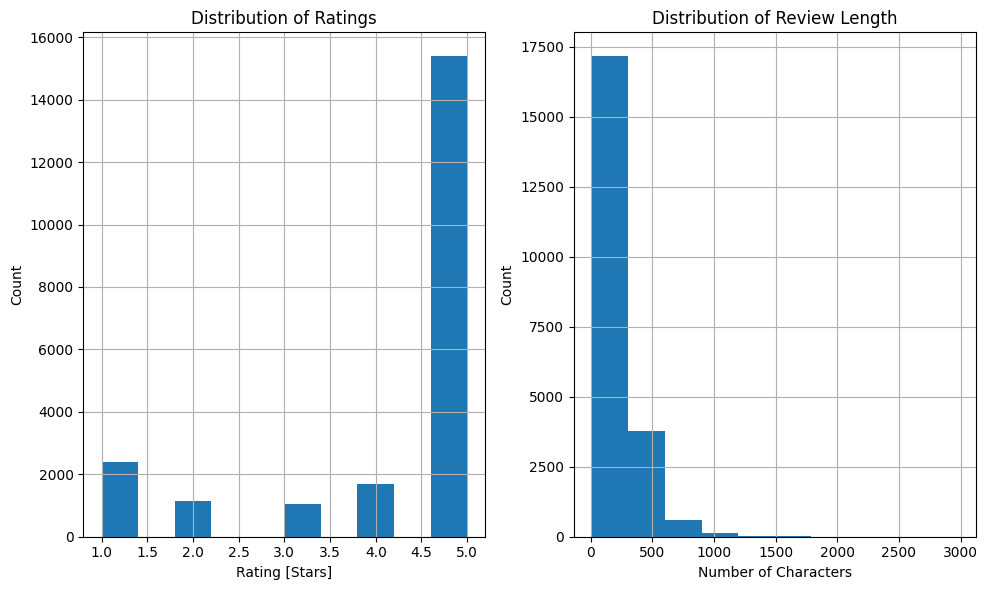

In [3]:
#1. Rating Distribution
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
cleaning_reviews['stars'].hist()
plt.title('Distribution of Ratings')
plt.xlabel('Rating [Stars]')
plt.ylabel('Count')

# 2. Review Length Distribution
plt.subplot(1,2,2)
cleaning_reviews['text_length'] = cleaning_reviews['clean_text'].str.len()
cleaning_reviews['text_length'].hist()
plt.title('Distribution of Review Length')
plt.xlabel('Number of Characters')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [4]:
print("Rating Statistics:")
print(cleaning_reviews['stars'].describe())
print("\nText Length Statistics:")
print(cleaning_reviews['text_length'].describe())


Rating Statistics:
count    21674.000000
mean         4.223955
std          1.384121
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

Text Length Statistics:
count    21674.000000
mean       228.280059
std        166.591031
min         11.000000
25%        117.000000
50%        191.000000
75%        281.000000
max       2975.000000
Name: text_length, dtype: float64


Top Brands by Review Count
brand_y
bj         7943
breyers    5007
hd         4655
talenti    4069
Name: count, dtype: int64

Top Brands by Average rating
brand_y
talenti    4.326591
bj         4.308007
hd         4.215854
breyers    4.024965
Name: rating, dtype: float64


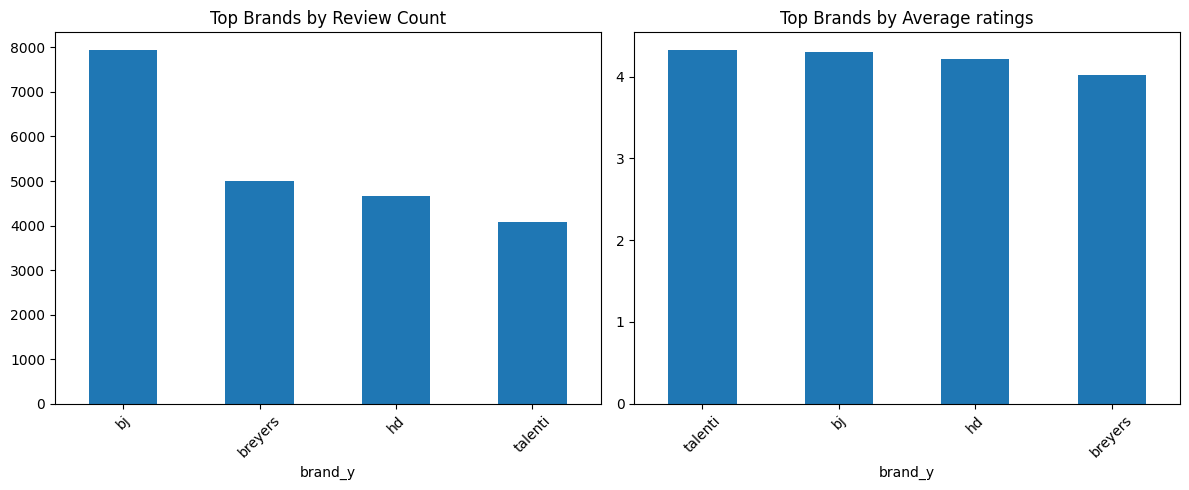

In [5]:
merged_data = cleaning_reviews.merge(products, on='key', how='left')
#merged_data.info()

# Change so that the brands names are 
top_data = merged_data['brand_y'].value_counts().head(10)
print("Top Brands by Review Count")
print(top_data)

brand_ratings = merged_data.groupby('brand_y')['rating'].mean().sort_values(ascending=False)
print("\nTop Brands by Average rating")
print(brand_ratings.head(10))

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
top_data.plot(kind='bar')
plt.title("Top Brands by Review Count")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
brand_ratings.plot(kind='bar')
plt.title("Top Brands by Average ratings")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Business Insights
#### Questions to Answer
1. Which brands get the most reviews?
2. Which brands have the highest rating?
3. Do longer reviews tend to be more helpful?
4. What words appear most in postive vs negative reviews?

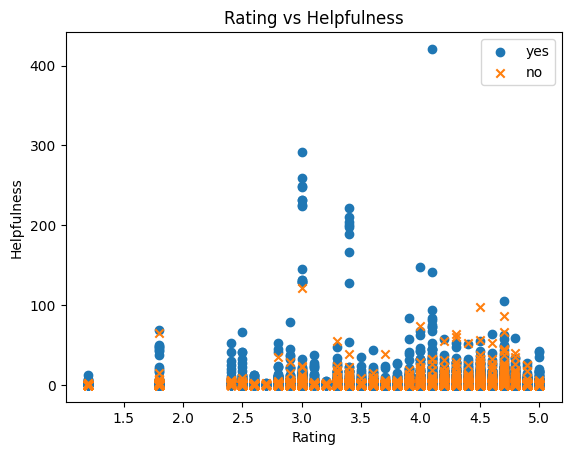

In [6]:
# Helpful vs Rating correlation
if 'helpful_yes' and 'helpful_no' in merged_data.columns:
    fig, ax = plt.subplots()
    ax.scatter(merged_data['rating'], merged_data['helpful_yes'], label='yes')
    ax.scatter(merged_data['rating'], merged_data['helpful_no'], label='no', marker='x')
    ax.legend()
    ax.set_xlabel('Rating')
    ax.set_ylabel('Helpfulness')
    ax.set_title('Rating vs Helpfulness')
    plt.show()

In [7]:
from collections import Counter

positive_reviews = merged_data[merged_data['rating'] >= 4]['clean_text']
all_positive_text = ' '.join(positive_reviews.astype(str))
positive_words = all_positive_text.split()

common_positive = Counter(positive_words).most_common(20)
print('Most common words in positive reviews:')
for word, count in common_positive:
    print(f"{word}: {count}")

negative_reviews = merged_data[merged_data['rating'] <= 2]['clean_text']
all_negative_text = ' '.join(negative_reviews.astype(str))
negative_words = all_negative_text.split()

common_negative = Counter(negative_words).most_common(20)
print('\nMost common words in negative reviews:')
for word, count in common_negative:
    print(f"{word}: {count}")

#def reviews_counter(review_type):#
#    if review_type == 'positive':
#        reviews = merged_data[merged_data['rating'] >= 4]['clean_text']
#        all_text = ' '.join(reviews.astype(str))
#        words = all_text.split()
#
#        common = Counter(words).most_common(20)
#
#        print(f"Most common words in {review_type} reviews:")
#        for word, count in common:
#            review_string = f"{word}: {count}"
#
#    return review_string
#print(reviews_counter('positive'))

Most common words in positive reviews:
the: 29372
i: 27136
and: 20731
this: 16644
a: 14881
is: 14592
it: 14473
ice: 14210
to: 13076
of: 12895
cream: 9881
my: 9545
in: 7744
was: 6773
so: 6276
but: 5866
for: 5864
flavor: 5614
love: 5549
chocolate: 4897

Most common words in negative reviews:
the: 786
i: 542
cookie: 435
and: 390
dough: 348
was: 334
it: 319
this: 265
a: 254
ice: 247
to: 244
is: 202
of: 195
cream: 194
like: 174
in: 149
not: 127
but: 117
my: 113
core: 112


In [8]:
# add more visualization